In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('bank-marketing.csv', sep=',')
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


 ### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [3]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df['pdays'].describe(), df['pdays'].median()

(count    45211.000000
 mean        40.197828
 std        100.128746
 min         -1.000000
 25%         -1.000000
 50%         -1.000000
 75%         -1.000000
 max        871.000000
 Name: pdays, dtype: float64,
 -1.0)

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [5]:
temp= df[df['pdays']<0].index
df.drop(labels= temp , inplace= True)

## Since pdays cant be negative

df.shape

(8257, 19)

In [6]:
df['pdays'].mean(), df['pdays'].median(), df['pdays'].min()

(224.57769165556496, 194.0, 1)

#### new median and mean are far different from previous ones

In [7]:
df['education'].value_counts()

secondary    4254
tertiary     2660
primary      1020
unknown       323
Name: education, dtype: int64

In [8]:
sec=df['education']=='secondary'


In [9]:
ty= df['balance'].value_counts()
med= df['balance'].median()
ty

0       449
1        21
2        20
4        17
5        17
       ... 
1661      1
8089      1
1946      1
1653      1
2019      1
Name: balance, Length: 3176, dtype: int64

### Plot a horizontal bar graph with the median values of balance for each education level value.Which group has the highest median?

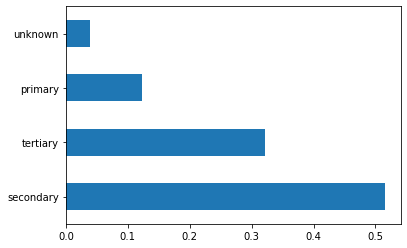

In [10]:
df.education.value_counts(normalize= True)
df.education.value_counts(normalize= True).plot.barh()
plt.show()

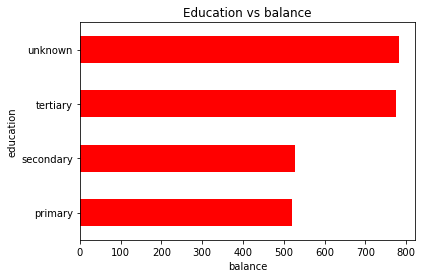

Hence Column Unknown has highest median 782.0


In [11]:

plt.title('Education vs balance')
plt.xlabel('balance')
s = df.groupby(['education']).median()['balance']
s.plot(kind='barh',color='red')
plt.show()

print('Hence Column Unknown has highest median',s.max())

### Make a box plot for pdays. Do you see any outliers?

Box plot for pdays


C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


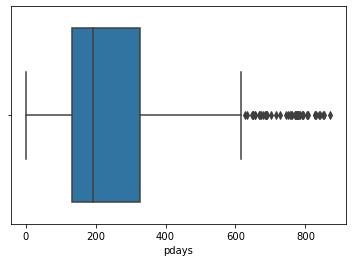

In [12]:
sns.boxplot(df['pdays'])
print('Box plot for pdays')
plt.show()


## Here after pdays more than 600 are outliers

## First, perform bi-variate analysis to identify the features that are directly associated with the target variable.

### - Convert the response variable to a convenient form


In [13]:
df['response']= np.where(df['response']=='no', 0, 1)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


### Make suitable plots for associations with numerical features and categorical features’

##### Differentiate catagorical and numerical data columns

In [14]:
columns = df.columns.to_list()
numerical= df._get_numeric_data().columns.to_list()
catagorical = list(set(columns) - set(numerical))
print('Numerical Columns')
print(numerical)
print('\nCategorical Columns')
print(catagorical)

Numerical Columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']

Categorical Columns
['education', 'contact', 'month', 'default', 'housing', 'marital', 'targeted', 'job', 'loan', 'poutcome']


##### Visualization using bar plots for all numerical variable vs response

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


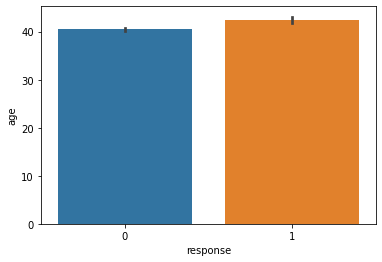

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


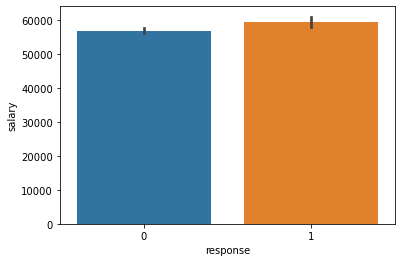

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


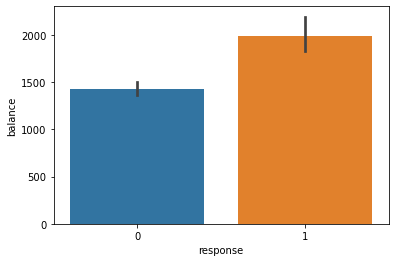

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


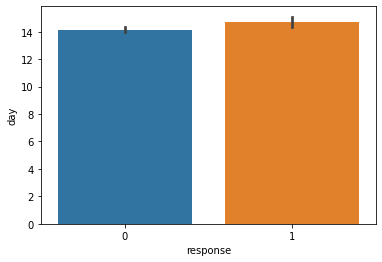

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


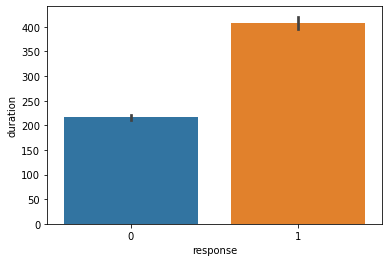

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


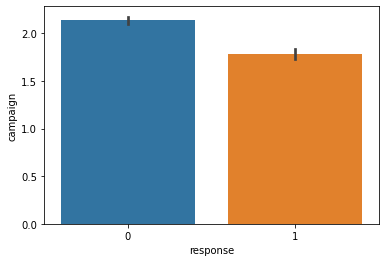

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


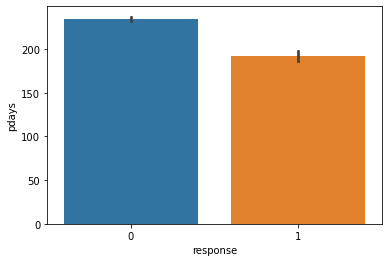

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


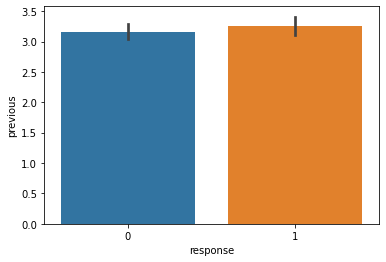

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


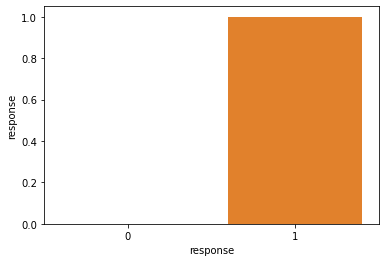

In [15]:
for i in df[numerical]:
    sns.barplot(df['response'], df[i])
    plt.show()

###### Visualization using bar plots for all categorical variables vs response

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


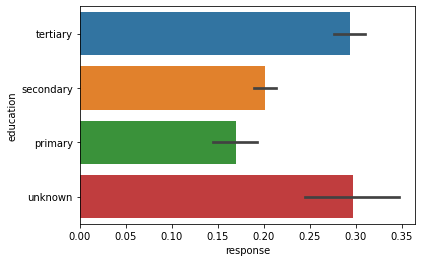

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


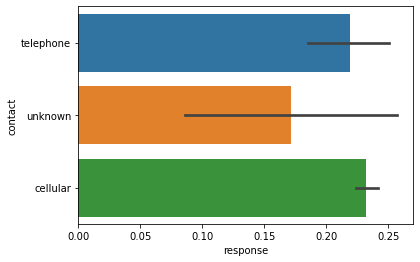

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


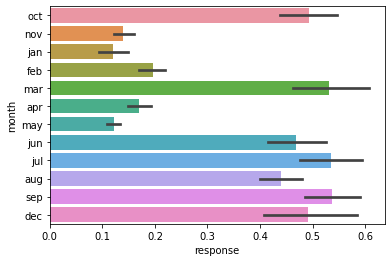

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


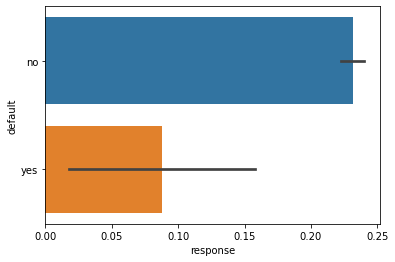

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


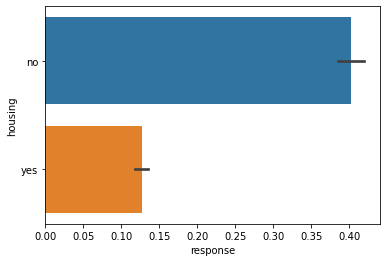

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


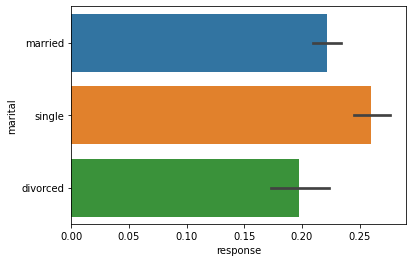

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


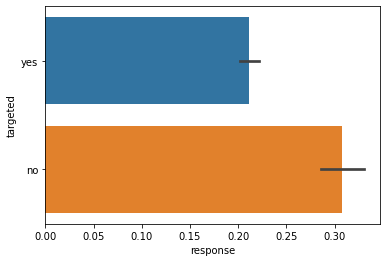

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


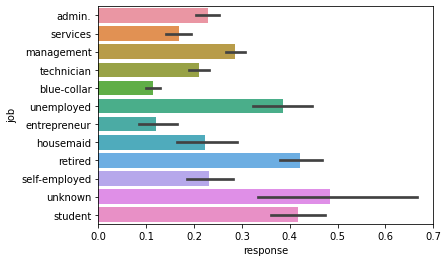

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


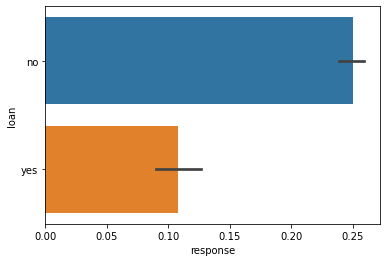

C:\Users\aikan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


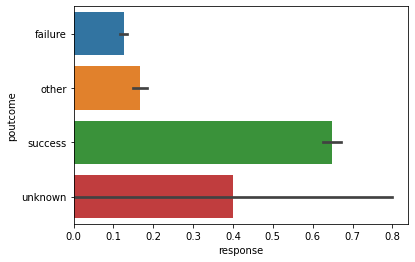

In [16]:
for i in df[catagorical]:
    sns.barplot(df['response'], df[i])
    plt.show()

### Are the features about the previous campaign data useful?
### Are pdays and poutcome associated with the target? 

####  ANSwer: Hence the previous campaign data is useful  and pdays and poutcome are also associated with the target ie response

### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.


####  ANSWER:: Hence we plan to use pdays since it is associated with response but pdays with value -1 , where previous campaign data is missing will be removed as we have already dropped them

### Before the predictive modeling part, make sure to perform –
### The necessary transformations for the categorical variables and the numeric variables


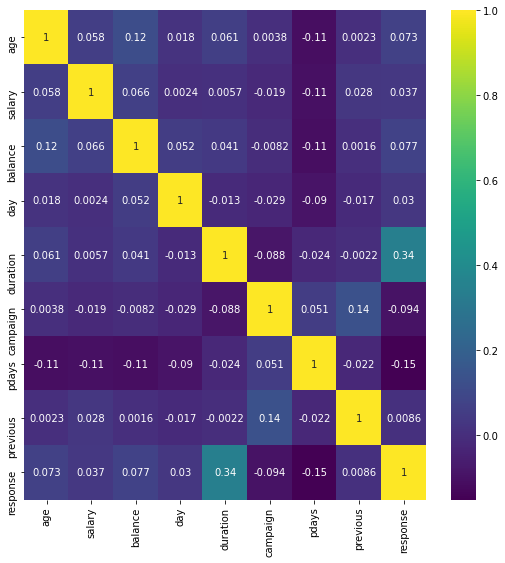

In [17]:
# WE can check summary associations using a correlation matrix for numerical variable
plt.figure(figsize=(9,9))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap= 'viridis')
plt.show()

### Handle variables corresponding to the previous campaign

 #####  Already done
 
###  Train test split

##### To be done in Logistic regression


## Logistic regression

In [18]:
#### Importing required models and parameters
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [19]:
# Describing the useful data 
df.reset_index(inplace = True)
df.drop(['index'],axis=1,inplace=True)
df.describe()


,age,salary,balance,day,duration,campaign,pdays,previous,response
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,57564.006298,1556.880102,14.289209,260.118687,2.056195,224.577692,3.177546,0.230713
std,11.425180,31791.407761,3060.593186,7.919176,235.208105,1.561169,115.344035,4.560820,0.421315
min,18.000000,0.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,168.000000,7.000000,113.000000,1.000000,133.000000,1.000000,0.000000
50%,38.000000,60000.000000,602.000000,14.000000,193.000000,2.000000,194.000000,2.000000,0.000000
75%,48.000000,70000.000000,1743.000000,20.000000,324.000000,2.000000,327.000000,4.000000,0.000000
max,93.000000,120000.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000,1.000000


In [20]:
### Handling catagorical variables first
df[catagorical].nunique()

education     4
contact       3
month        12
default       2
housing       2
marital       3
targeted      2
job          12
loan          2
poutcome      4
dtype: int64

In [21]:
# encoding as per ones and zeros

E1 = pd.get_dummies(df['education'],drop_first=True,prefix='education')
E2 = pd.get_dummies(df['contact'],drop_first=True,prefix='contact')
E3 = pd.get_dummies(df['default'],drop_first=True,prefix='default')
E4 = pd.get_dummies(df['loan'],drop_first=True,prefix='loan')
E5 = pd.get_dummies(df['housing'],drop_first=True,prefix='housing')
E6 = pd.get_dummies(df['targeted'],drop_first=True,prefix='targeted')
E7 = pd.get_dummies(df['month'],drop_first=True,prefix='month')
E8 = pd.get_dummies(df['poutcome'],drop_first=True,prefix='poutcome')
E9 = pd.get_dummies(df['job'],drop_first=True,prefix='job')
E10 = pd.get_dummies(df['marital'],drop_first=True,prefix='marital')

df_encod= pd.concat([E1,E2,E3,E4,E5,E6,E7,E8],axis=1)
df_encod.head()

,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,default_yes,loan_yes,housing_yes,targeted_yes,month_aug,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,1,0,0
2,1,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
### Comparing with the actual dummy values in data 
df.drop(df[catagorical],axis=1,inplace=True)
df_dummy = pd.concat([df,df_encod],axis=1)
df_dummy.head()

,age,salary,balance,day,duration,campaign,pdays,previous,response,education_secondary,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,33,50000,882,21,39,1,151,3,0,0,...,0,0,0,0,0,1,0,0,0,0
1,42,50000,-247,21,519,1,166,1,1,1,...,0,0,0,0,0,1,0,1,0,0
2,33,70000,3444,21,144,1,91,4,1,1,...,0,0,0,0,0,1,0,0,0,0
3,36,100000,2415,22,73,1,86,4,0,0,...,0,0,0,0,0,1,0,1,0,0
4,36,100000,0,23,140,1,143,3,1,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
### Now since X is always an independent variable and y is a dependent variable

## Assigning variables

y= df_dummy['response']
X= df_dummy.drop(['response'], axis=1)
X

,age,salary,balance,day,duration,campaign,pdays,previous,education_secondary,education_tertiary,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,33,50000,882,21,39,1,151,3,0,1,...,0,0,0,0,0,1,0,0,0,0
1,42,50000,-247,21,519,1,166,1,1,0,...,0,0,0,0,0,1,0,1,0,0
2,33,70000,3444,21,144,1,91,4,1,0,...,0,0,0,0,0,1,0,0,0,0
3,36,100000,2415,22,73,1,86,4,0,1,...,0,0,0,0,0,1,0,1,0,0
4,36,100000,0,23,140,1,143,3,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,34,20000,1475,16,1166,3,530,12,1,0,...,0,0,0,0,1,0,0,1,0,0
8253,53,100000,583,17,226,1,184,4,0,1,...,0,0,0,0,1,0,0,0,1,0
8254,73,55000,2850,17,300,1,40,8,1,0,...,0,0,0,0,1,0,0,0,0,0
8255,72,55000,5715,17,1127,5,184,3,1,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
### Performing train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 5)

# Checking data split

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6605, 31)
(6605,)
(1652, 31)
(1652,)


### Fitting and scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


### Performing regression

In [33]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)


print(y_train_pred)
print(y_test_pred)

[1 1 0 ... 0 0 0]
[0 0 0 ... 0 1 0]


#### Checking performance parameters on training set to check accuracy of model

In [34]:
print(recall_score(y_train,y_train_pred))
print(precision_score(y_train,y_train_pred))
print(f1_score(y_train,y_train_pred))
print(accuracy_score(y_train,y_train_pred))


0.5525624178712221
0.7151360544217688
0.6234247590808006
0.8461771385314156


#### Calculating performance parameters on test dataset 

In [35]:

print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))
print(f1_score(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred))

0.5195822454308094
0.6567656765676567
0.5801749271137026
0.8256658595641646


### Confusion matrix

In [36]:
print('Hence confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print('Also Confusion Matrix for testing data is:')
print(confusion_matrix(y_test,y_test_pred))

Hence confusion Matrix for training data is:
[[4748  335]
 [ 681  841]]


Also Confusion Matrix for testing data is:
[[1165  104]
 [ 184  199]]


# Random Forest

In [39]:
## importing random forest

from sklearn.ensemble import RandomForestClassifier


In [41]:

rf_model = RandomForestClassifier(max_depth=15,min_samples_split=5)
rf_model.fit(X_train,y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print(y_train_pred)
print(y_test_pred)

[0 0 0 ... 0 0 1]
[0 0 0 ... 1 1 0]


#### Checking performance parameters on Training dataset

In [48]:

print('Recall=',recall_score(y_train,y_train_pred))
print('Precision =',precision_score(y_train,y_train_pred))
print('F1 score=',f1_score(y_train,y_train_pred))
print('Accuracy=',accuracy_score(y_train,y_train_pred))

Recall= 0.866622864651774
Precision = 0.9613702623906706
F1 score= 0.9115411195577057
Accuracy= 0.9612414837244512


#### Checking performance paramaters on test dataset

In [47]:
print('Recall value is',recall_score(y_test,y_test_pred))
print('Precision is',precision_score(y_test,y_test_pred))
print('f1 score is',f1_score(y_test,y_test_pred))
print('Accuracy is',accuracy_score(y_test,y_test_pred))

Recall value is 0.5509138381201044
Precision is 0.705685618729097
f1 score is 0.6187683284457478
Accuracy is 0.8426150121065376


### Confusion matrices

In [49]:
print('Confusion Matrix for training data is:')
print(confusion_matrix(y_train, y_train_pred))


Confusion Matrix for training data is:
[[5030   53]
 [ 203 1319]]


In [51]:
print('Confusion Matrix for testing data is:')
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix for testing data is:
[[1181   88]
 [ 172  211]]
